In [26]:
# import required/necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import pickle

In [2]:
# Load Data Set
df = pd.read_csv("creditcard.csv")
# Check basic information about the dataset
df.info()
# Display the above five rows of a dataset
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Exploratory Data Analysis

In [3]:
df.shape

(284807, 31)

In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [5]:
# Check Data Set Containing Duplicate value or not
df.duplicated().sum()

1081

In [6]:
# copied data set
df1 = df.copy()

In [7]:
# Remove duplicate value from the Data Set
df1.drop_duplicates(inplace=True)

In [8]:
# Check duplicates
df1.duplicated().sum()

0

In [9]:
# Count/Check Class distribution
class_counts = df1['Class'].value_counts()
class_counts

0    283253
1       473
Name: Class, dtype: int64

# Visuallize Class distribution using a Pie Chart & Bar Plot

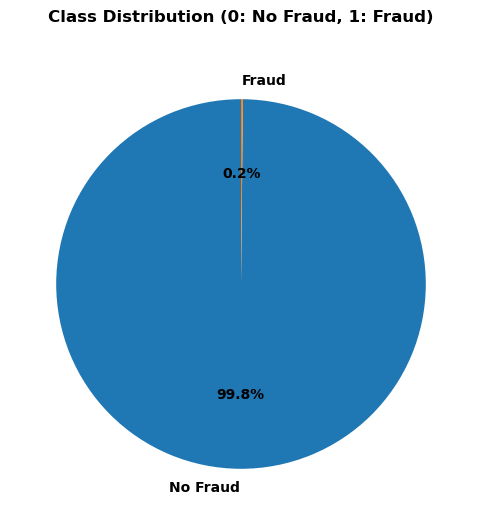

Class Distribution:
0    283253
1       473
Name: Class, dtype: int64


In [10]:
# Calculate the class distribution using a pie Chart
plt.figure(figsize=(6, 6))
plt.pie(class_counts, labels=['No Fraud', 'Fraud'], autopct='%1.1f%%', startangle=90,textprops={'fontsize': 10, 'fontweight': 'bold'})
plt.title('Class Distribution (0: No Fraud, 1: Fraud)', fontdict={'fontsize': 12, 'fontweight': 'bold'}, y=1.05)
plt.show()
# Print the class distribution in numbers
print(f"Class Distribution:\n{class_counts}")

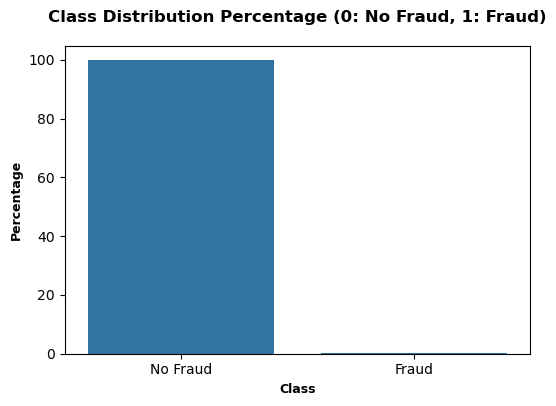

In [11]:
# Calculate percentages for class distribution
class_counts_percent = class_counts / len(df1) * 100

# Plot a bar plot for class distribution with percentages
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts_percent.index, y=class_counts_percent.values)
plt.title('Class Distribution Percentage (0: No Fraud, 1: Fraud)', fontweight='bold', fontsize=12, y=1.05)
plt.xlabel('Class', fontweight='bold', fontsize=9)
plt.ylabel('Percentage',fontweight='bold', fontsize=9)
plt.xticks([0, 1], ['No Fraud', 'Fraud'])
plt.show()

Correlation Matrix

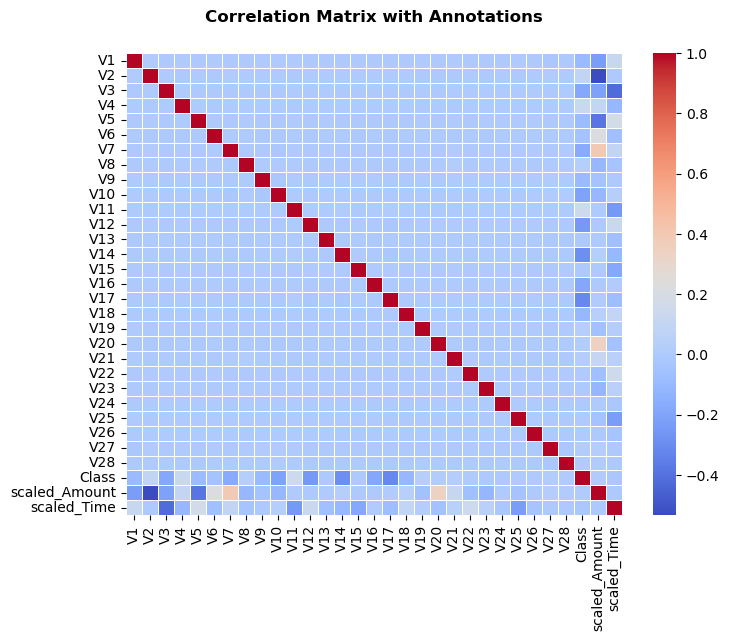

In [25]:
# Plot the correlation matrix
plt.figure(figsize=(8, 6))
corr = df1.corr()
sns.heatmap(corr, annot=False, linewidths=0.5, cmap='coolwarm')
plt.title('Correlation Matrix with Annotations', fontweight='bold', fontsize=12, y=1.05)
plt.show()

# Data Preprocessing

In [13]:
# Standardize the 'Amount' and 'Time' columns
scaler = StandardScaler()
df1['scaled_Amount'] = scaler.fit_transform(df1['Amount'].values.reshape(-1, 1))
df1['scaled_Time'] = scaler.fit_transform(df1['Time'].values.reshape(-1, 1))

In [14]:
# Drop the original 'Amount' and 'Time' columns
df1.drop(['Amount', 'Time'], axis=1, inplace=True)
df1.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_Amount,scaled_Time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244200,-1.996823
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342584,-1.996823
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.158900,-1.996802
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.139886,-1.996802
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073813,-1.996781


# Train-Test Split

In [15]:
# Separate feature & the target variable
X = df1.drop('Class', axis=1)
y = df1['Class']

In [16]:
# Train-test-spltting data (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                test_size=0.2, random_state=42)

In [17]:
# Check the shapes of training and testing sets
X_train.shape, X_test.shape

((226980, 30), (56746, 30))

# Handle Imbalance Class

In [18]:
# Handle class imbalance using undersampling
fraud = df1[df1['Class'] == 1]
non_fraud = df1[df1['Class'] == 0]

# Undersample the non-fraudulent transactions
non_fraud_sample = non_fraud.sample(len(fraud))

# Create a new balanced dataset
balanced_data = pd.concat([fraud, non_fraud_sample])

# Split into features and target
X_balanced = balanced_data.drop('Class', axis=1)
y_balanced = balanced_data['Class']

# Train-test split for balanced data
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [19]:
# Build a Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_bal, y_train_bal)

# Make predictions on the test set
y_pred_bal = rf.predict(X_test_bal)

# Model Evaluation

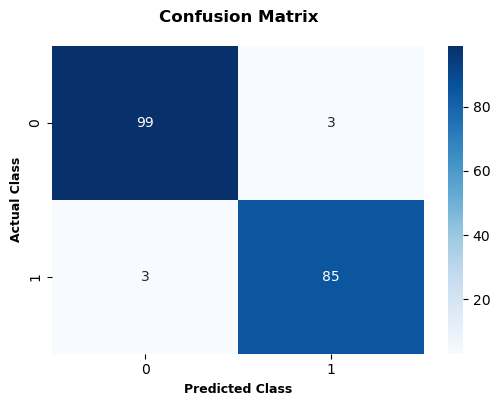

In [20]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test_bal, y_pred_bal)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix', fontweight='bold', fontsize=12, y=1.05)
plt.ylabel('Actual Class',fontweight='bold', fontsize=9)
plt.xlabel('Predicted Class',fontweight='bold', fontsize=9)
plt.show()

In [21]:
# Classification report
print(classification_report(y_test_bal, y_pred_bal))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       102
           1       0.97      0.97      0.97        88

    accuracy                           0.97       190
   macro avg       0.97      0.97      0.97       190
weighted avg       0.97      0.97      0.97       190



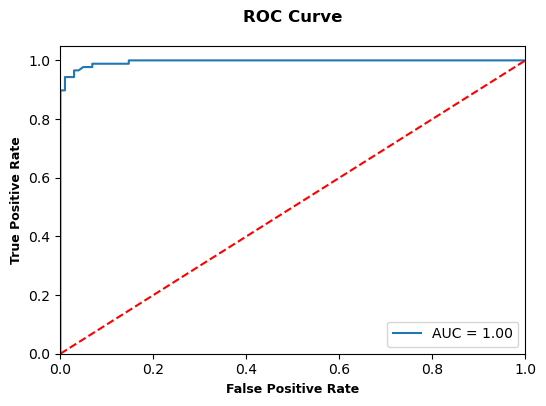

In [22]:
# ROC Curve and AUC
y_pred_prob = rf.predict_proba(X_test_bal)[:, 1]
fpr, tpr, _ = roc_curve(y_test_bal, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate',fontweight='bold', fontsize=9)
plt.ylabel('True Positive Rate',fontweight='bold', fontsize=9)
plt.title('ROC Curve', fontweight='bold', fontsize=12, y=1.05)
plt.legend(loc='lower right')
plt.show()

# Feature Importance Visualization

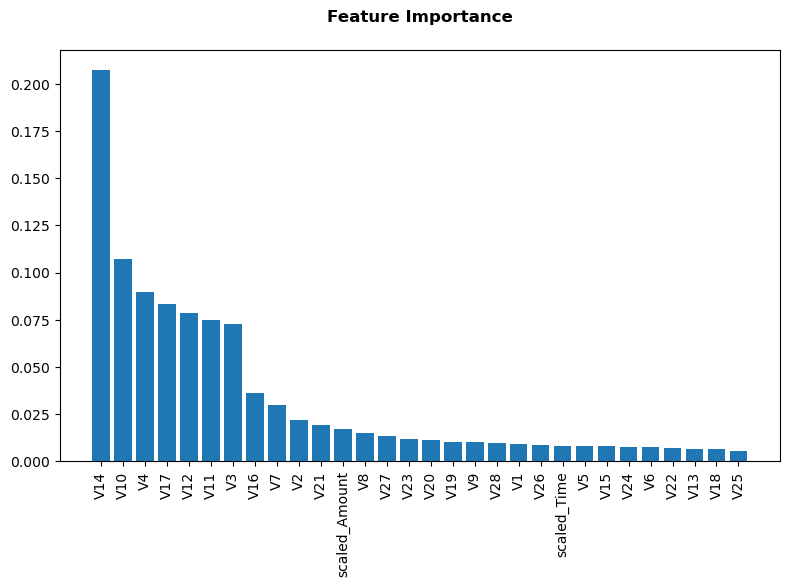

In [23]:
# Get feature importances from the Random Forest model
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.title("Feature Importance", fontweight='bold', fontsize=12, y=1.05)
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), features[indices], rotation=90)
plt.tight_layout()
plt.show()

In [28]:
# Save the trained model using pickle
with open('fraud_detection_model.pkl', 'wb') as file:
    pickle.dump(rf, file)

print("Model saved as fraud_detection_model.pkl")

Model saved as fraud_detection_model.pkl
